### Read the Data and Visualize

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install xgboost


In [3]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 28 kB/s 


In [125]:
import pandas as pd
import numpy as np

In [126]:
train_features = pd.read_csv("/content/drive/MyDrive/ML Sem 07/Challenge/TrainVal.csv")
train_labels = pd.read_csv("/content/drive/MyDrive/ML Sem 07/Challenge/TrainLables.csv")

In [127]:
train_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [128]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [129]:
total = train_features.isnull().sum().sort_values(ascending=False)
percent_1 = train_features.isnull().sum()/train_features.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(7)

,Total,%
scheme_name,28166,47.4
scheme_management,3877,6.5
installer,3655,6.2
funder,3635,6.1
public_meeting,3334,5.6
permit,3056,5.1
subvillage,371,0.6


### Explore Feature Values

In [130]:
train_features['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [131]:
train_features['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [132]:
train_features['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [133]:
train_features['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [134]:
train_features['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [135]:
train_features['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [136]:
train_features['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [137]:
train_features['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [138]:
train_features['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [139]:
train_features['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [140]:
train_features['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [141]:
train_features['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [142]:
train_features['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [143]:
train_features['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [144]:
train_features['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [145]:
train_features['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [146]:
train_features['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [147]:
train_features['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [148]:
train_features['district_code'].value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [149]:
train_features['funder'].value_counts()
train_features['funder'].value_counts()
#1000

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Yasini Selemani              1
Villegers                    1
Seleman Rashid               1
World Bank/government        1
Lion Clu                     1
Name: funder, Length: 1897, dtype: int64

In [150]:
train_features['installer'].value_counts()
train_features['installer'].value_counts()
#750

DWE               17402
Government         1825
RWE                1206
Commu              1060
DANIDA             1050
                  ...  
Teresa Munyama        1
EGYPT                 1
Joseph nkunda         1
LGQ                   1
NYAHALE               1
Name: installer, Length: 2145, dtype: int64

In [151]:
train_features['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

### Discover Correaltions

In [152]:
train_features_copy=train_features
train_features_copy['label']=train_labels["status_group"]

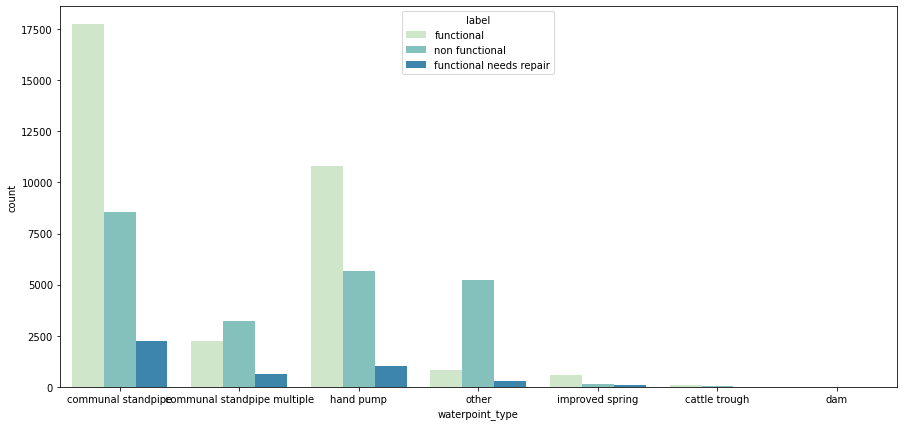

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
sns.countplot(x='waterpoint_type',data = train_features_copy, hue = 'label',palette='GnBu')
plt.show()

We can see that there is a difference in communal standpipe and CSPipe multiple. So we will use waterpoint type.

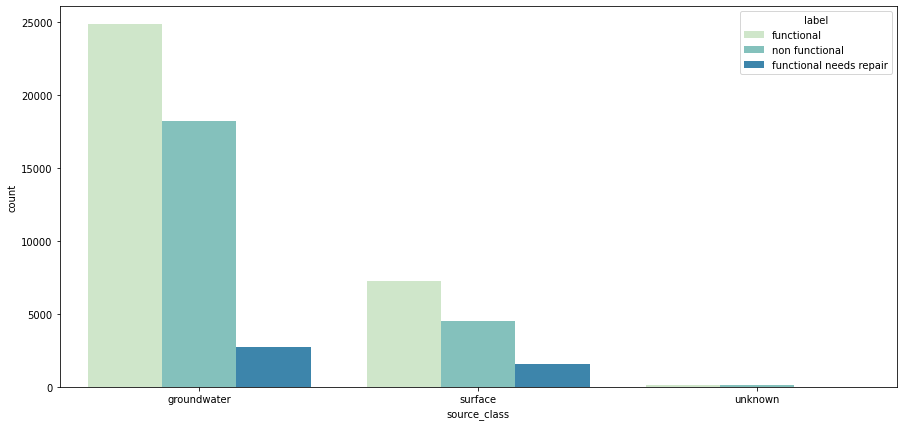

In [154]:
plt.figure(figsize=(15,7))
sns.countplot(x='source_class',data = train_features_copy, hue = 'label',palette='GnBu')
plt.show()

Source seems to show a similar pattern in all levels.

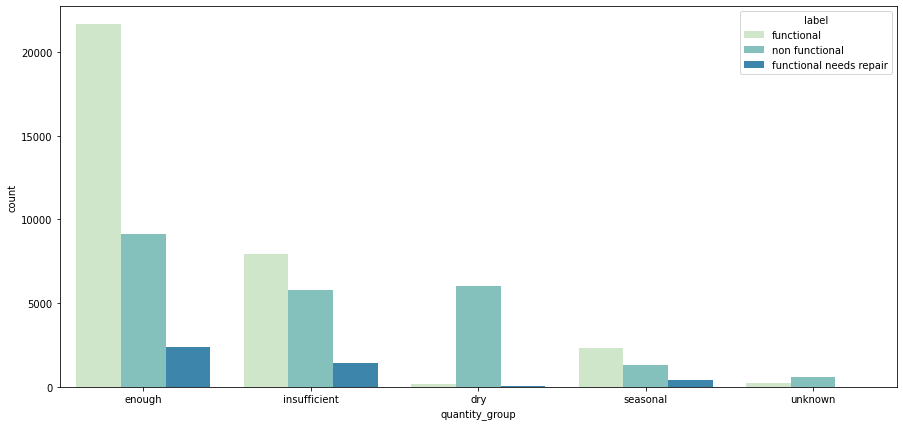

In [155]:
plt.figure(figsize=(15,7))
sns.countplot(x='quantity_group',data = train_features_copy, hue = 'label',palette='GnBu')
plt.show()

There is no difference in quantity or quantity group.

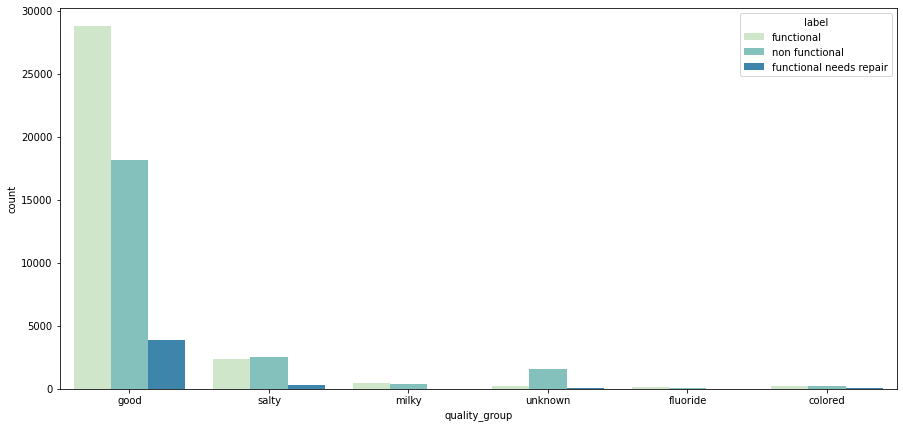

In [156]:
plt.figure(figsize=(15,7))
sns.countplot(x='quality_group',data = train_features_copy, hue = 'label',palette='GnBu')
plt.show()

We will use "quality group" instead of "water quality" as abandoned type data are rare.

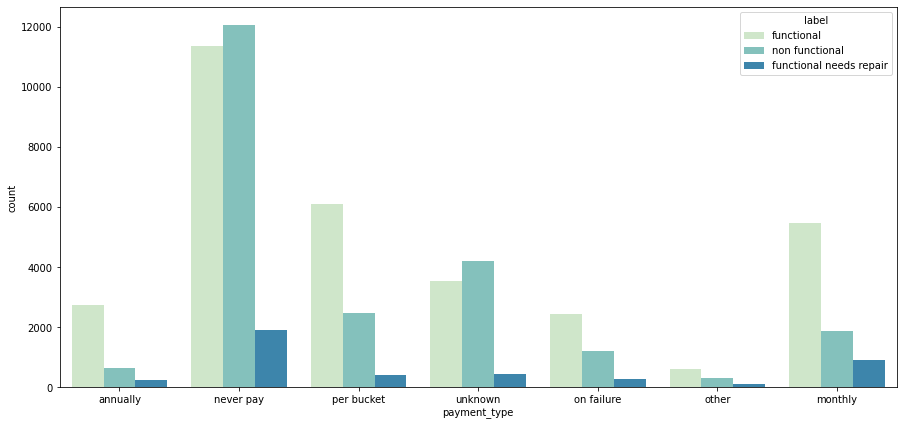

In [157]:
plt.figure(figsize=(15,7))
sns.countplot(x='payment_type',data = train_features_copy, hue = 'label',palette='GnBu')
plt.show()

Payment and Payment type are the same.

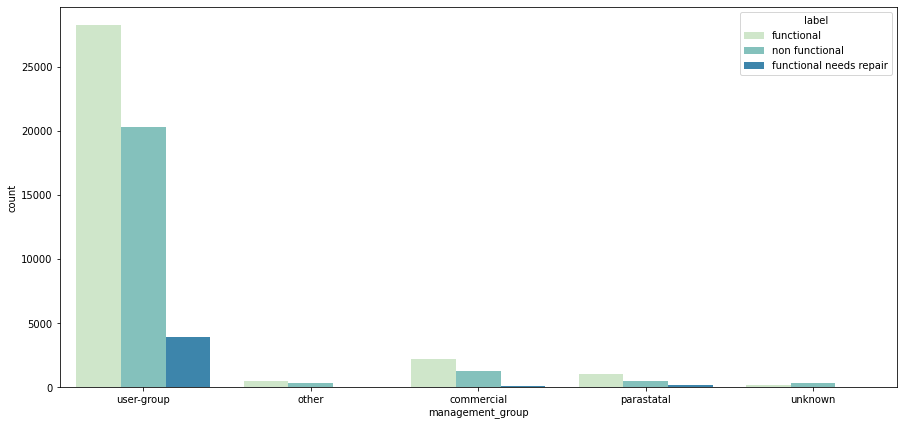

In [158]:
plt.figure(figsize=(15,7))
sns.countplot(x='management_group',data = train_features_copy, hue = 'label',palette='GnBu')
plt.show()

We will use management group as the distribution does not show much difference when grouped or not. 

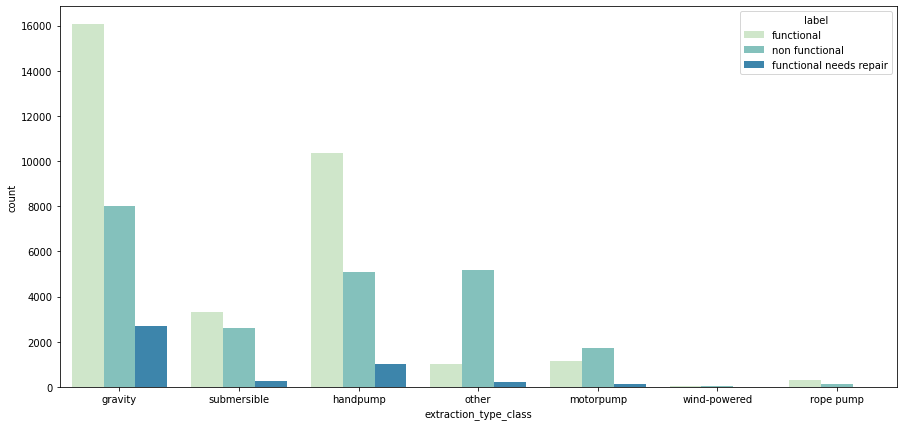

In [159]:
plt.figure(figsize=(15,7))
sns.countplot(x='extraction_type_class',data = train_features_copy, hue = 'label',palette='GnBu')
plt.show()

We will use extraction type class, because except for afridev other subclasses did not show significant difference with the parent class distribution.

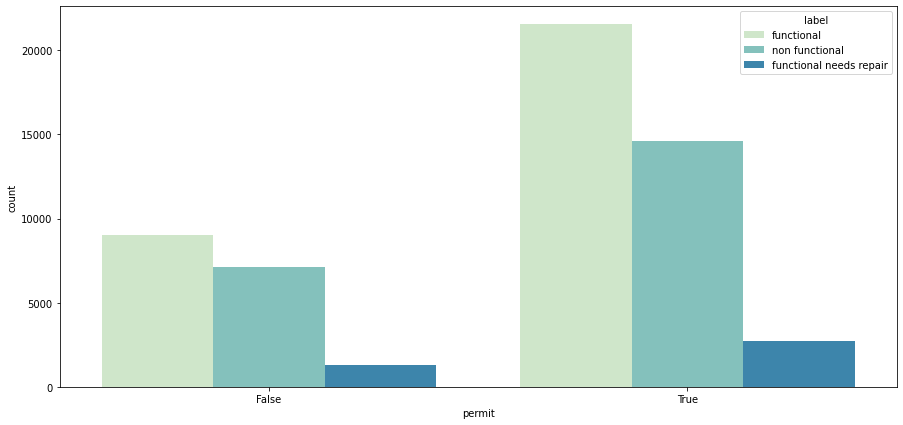

In [160]:
plt.figure(figsize=(15,7))
sns.countplot(x='permit',data = train_features_copy, hue = 'label',palette='GnBu')
plt.show()

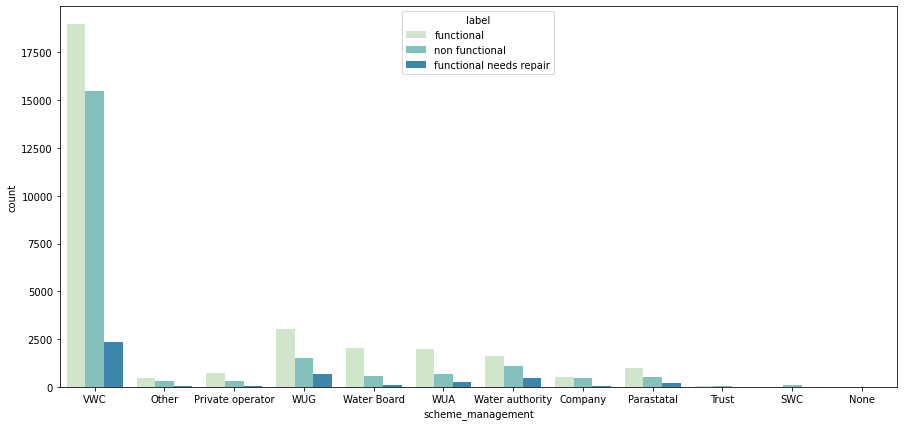

In [161]:
plt.figure(figsize=(15,7))
sns.countplot(x='scheme_management',data = train_features_copy, hue = 'label',palette='GnBu')
plt.show()

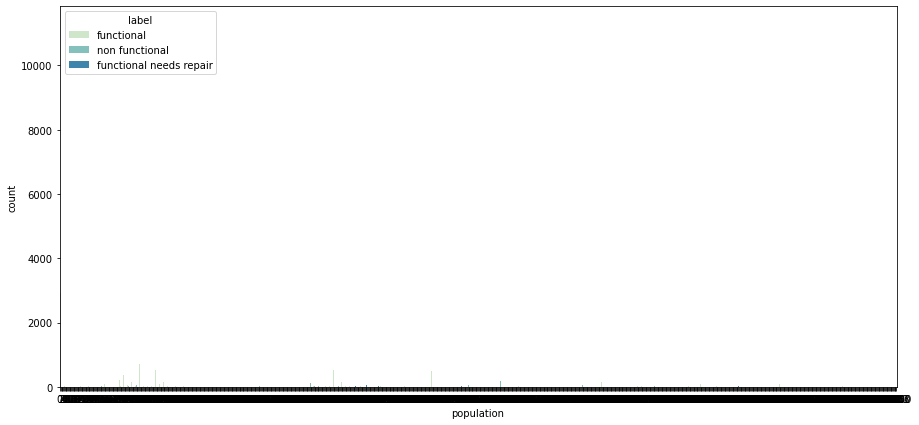

In [162]:
plt.figure(figsize=(15,7))
sns.countplot(x='population',data = train_features_copy, hue = 'label',palette='GnBu')
plt.show()

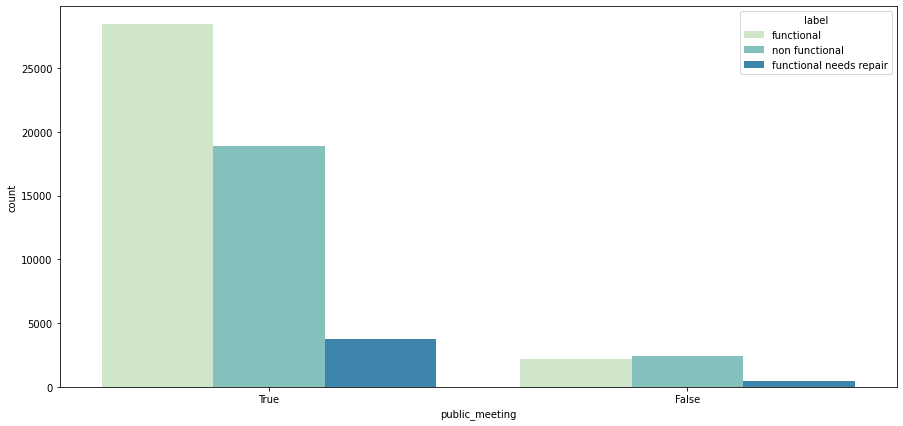

In [163]:
plt.figure(figsize=(15,7))
sns.countplot(x='public_meeting',data = train_features_copy, hue = 'label',palette='GnBu')
plt.show()

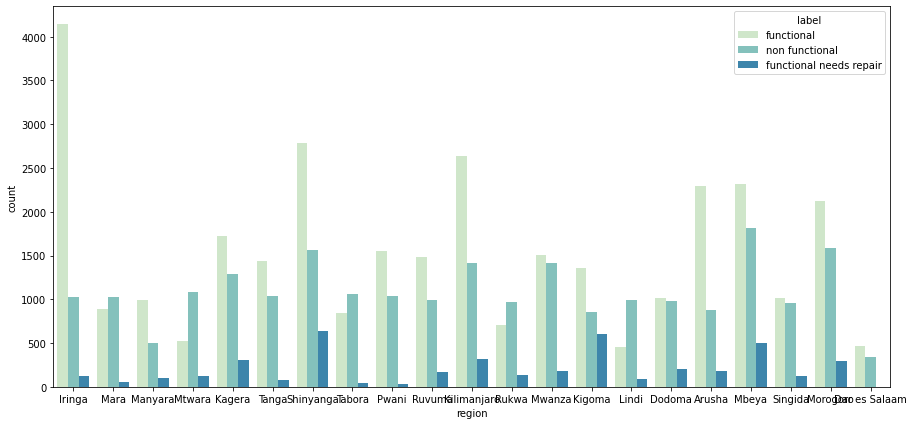

In [164]:
plt.figure(figsize=(15,7))
sns.countplot(x='region',data = train_features_copy, hue = 'label',palette='GnBu')
plt.show()

(1960.0, 2015.0)

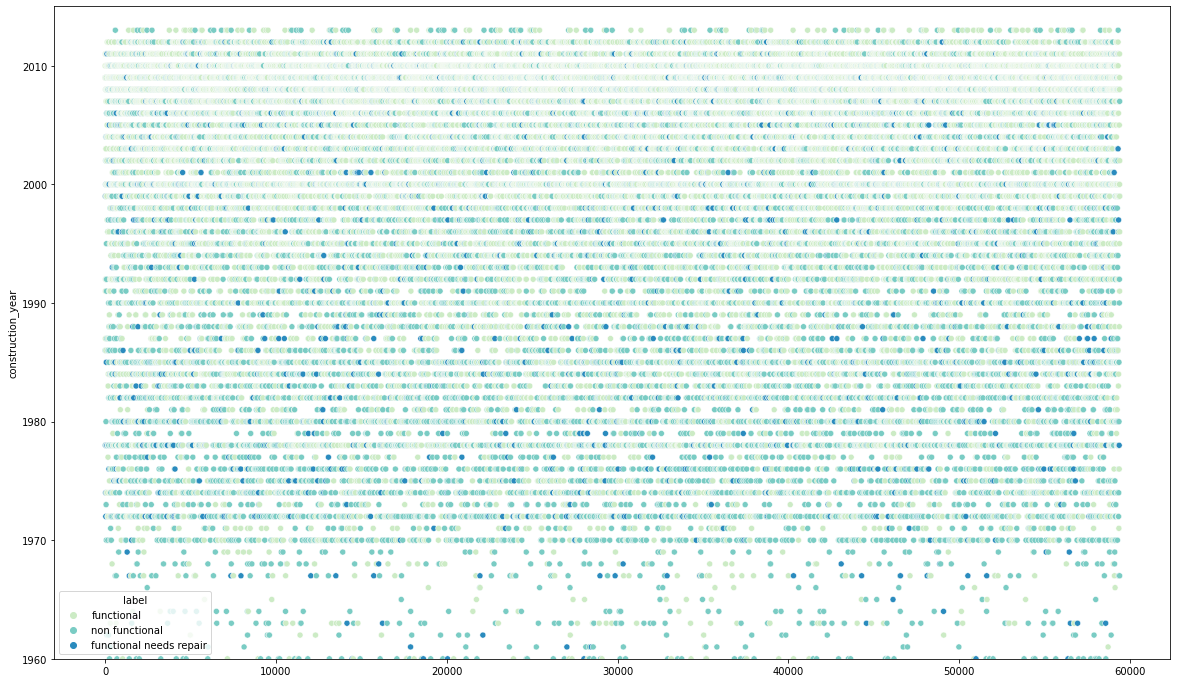

In [165]:
plt.figure(figsize=(20,12))
sns.scatterplot(data=train_features_copy, y="construction_year",x=train_features_copy.index, hue="label",palette='GnBu')
plt.ylim(1960,2015)

(27.0, 45.0)

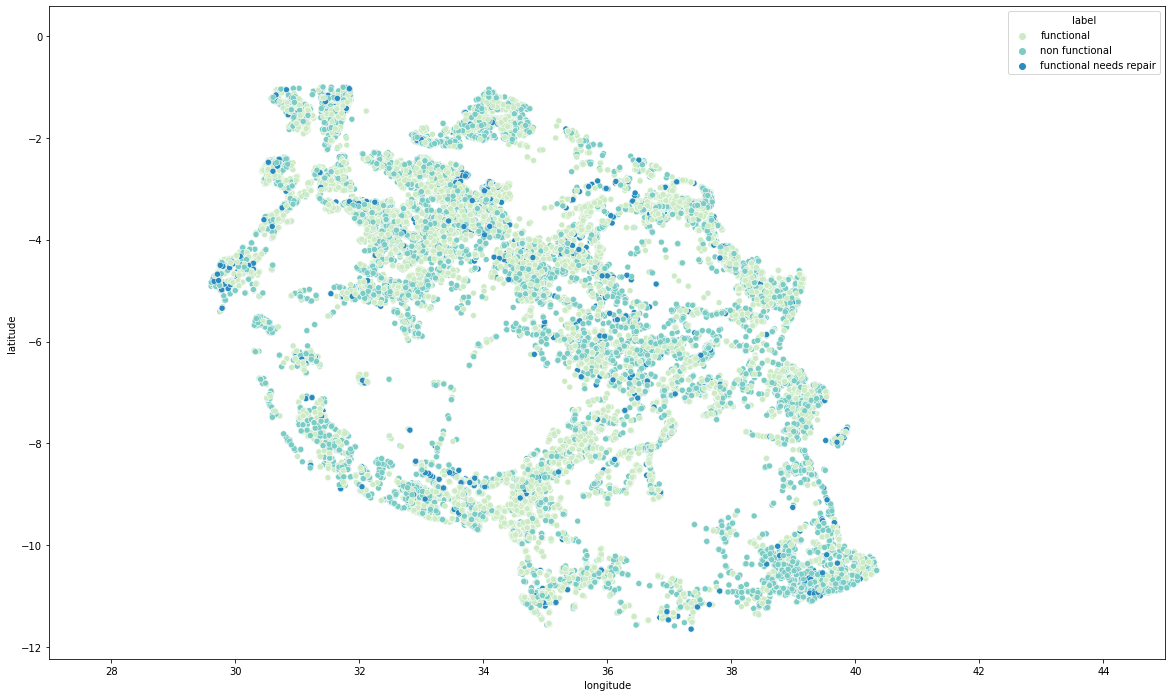

In [166]:
plt.figure(figsize=(20,12))
sns.scatterplot(data=train_features_copy, x="longitude",y="latitude", hue="label",palette='GnBu')
plt.xlim(27,45)

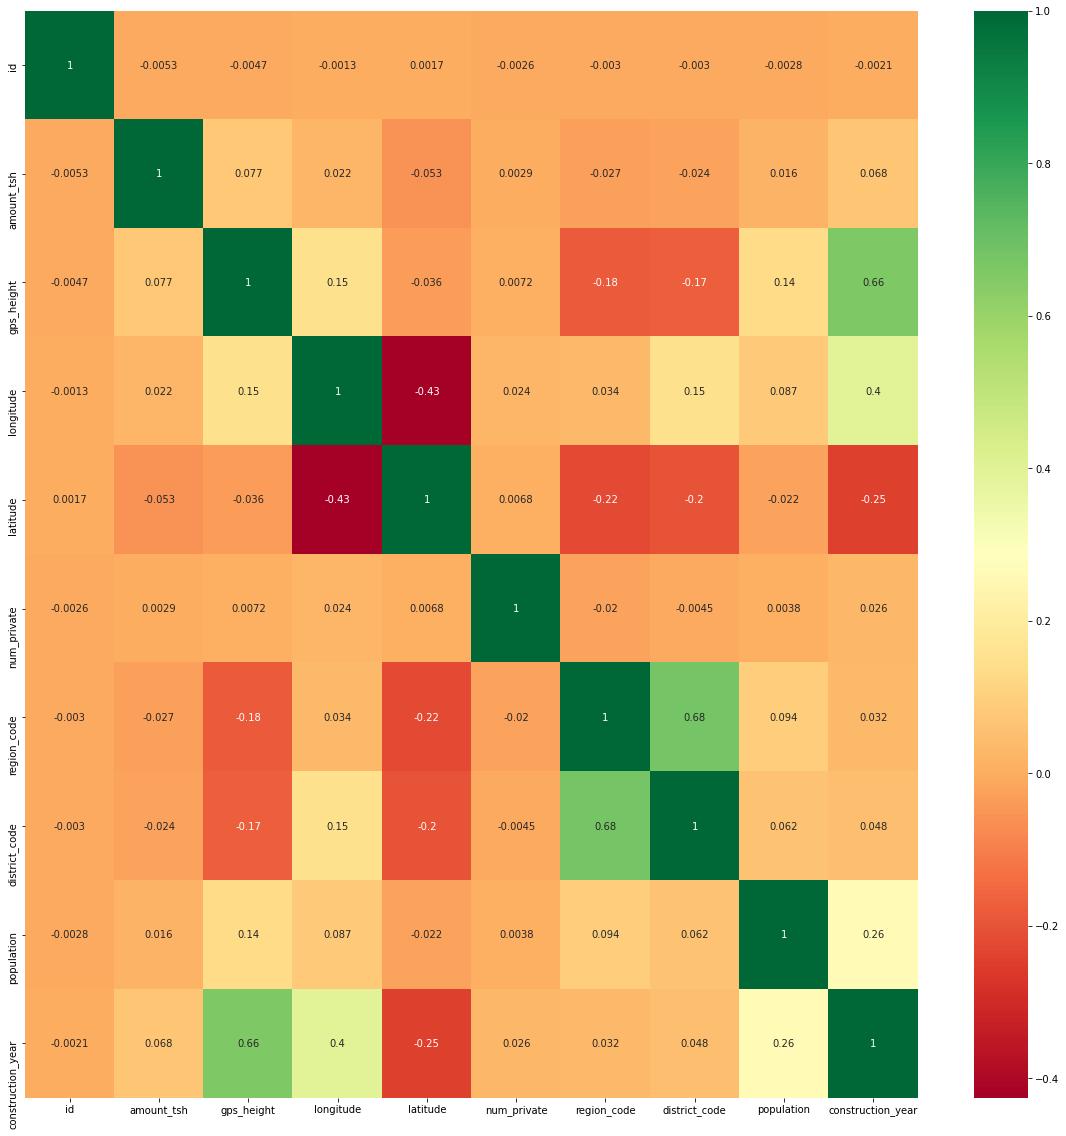

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = train_features_copy.corr()
plt.figure(figsize=(20,20))
g=sns.heatmap(train_features_copy.corr(),annot=True,cmap="RdYlGn")

### Handle Missing Data

In [168]:
train_features['public_meeting'] = train_features['public_meeting'].fillna(train_features['public_meeting'].value_counts().index[0])
train_features['permit'] = train_features['permit'].fillna(train_features['permit'].value_counts().index[0])
train_features['scheme_management'] = train_features['scheme_management'].fillna(train_features['scheme_management'].value_counts().index[0])

### Transform Data

In [169]:
train_features['public_meeting'] = train_features['public_meeting'].astype(int)
train_features['permit'] = train_features['permit'].astype(int)

Label encode categorical data

In [171]:
from sklearn.preprocessing import LabelEncoder

labelEncoder=LabelEncoder()
label_object={}
categorical_columns = ['scheme_management','basin','region','extraction_type_class','management_group','payment_type','quality_group','quantity_group',
'source_class','waterpoint_type']
for col in categorical_columns:
    labelencoder = LabelEncoder()
    labelencoder.fit(train_features[col])
    train_features[col] = labelencoder.fit_transform(train_features[col])
    label_object[col] = labelencoder

Scale numeric data

In [172]:
train_features["amount_tsh"] = (train_features["amount_tsh"] - train_features["amount_tsh"].min()) / (train_features["amount_tsh"].max() - train_features["amount_tsh"].min())
train_features["gps_height"] = (train_features["gps_height"] - train_features["gps_height"].min()) / (train_features["gps_height"].max() - train_features["gps_height"].min())
train_features["population"] = (train_features["population"] - train_features["population"].min()) / (train_features["population"].max() - train_features["population"].min())
train_features["num_private"] = (train_features["num_private"] - train_features["num_private"].min()) / (train_features["num_private"].max() - train_features["num_private"].min())


### Drop Columns

In [173]:
drop_columns=['scheme_name','id','waterpoint_type_group','source_type','source','quantity','water_quality','payment', 
              'management','extraction_type_group','extraction_type','recorded_by','ward','lga','district_code','region_code','subvillage',
'wpt_name','installer','funder','date_recorded','label']

for col in drop_columns:
    train_features = train_features.drop(col,axis=1)

In [174]:
train_features.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,num_private,basin,region,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type
0,0.017143,31,0.517483,40,34.938093,-9.856322,0.0,1,3,0.003574,1,7,0,1999,0,4,0,2,1,0,1
1,0.000000,45,0.520629,40,34.698766,-2.147466,0.0,4,9,0.009180,1,2,1,2010,0,4,2,2,2,1,1
2,0.000071,45,0.271329,38,37.460664,-3.821329,0.0,5,8,0.008197,1,7,1,2009,0,4,5,2,1,1,2
3,0.000000,38,0.123427,34,38.486161,-11.155298,0.0,7,12,0.001902,1,7,1,1986,5,4,2,2,0,0,2
4,0.000000,45,0.031469,40,31.130847,-1.825359,0.0,4,4,0.000000,1,7,1,0,0,1,2,2,3,1,1


### Create the Model

In [175]:
y = train_labels[["status_group"]]

In [176]:

label_object2 = {}
labelencoder = LabelEncoder()
labelencoder.fit(y['status_group'])
y['status_group']=labelEncoder.fit_transform(y['status_group'])
label_object2['status_group'] = labelencoder



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [177]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train_features, y, stratify=y, random_state=1121218
)

Evaluate

In [178]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline
level0Class = list()

level0Class.append(('xg',XGBClassifier(n_estimators=251, max_depth=4, learning_rate=0.10, colsample_bytree=0.2,reg_lambda=1, silent=False)))
level0Class.append(('ctb',CatBoostClassifier(learning_rate=0.10)))

level1Class = LogisticRegression(penalty="l2")

stk_cl = StackingClassifier(estimators= level0Class, final_estimator= level1Class, cv=5)

In [179]:
full_pipeline = Pipeline([
    ("estimators", (stk_cl)),
])
full_pipeline

Pipeline(memory=None,
         steps=[('estimators',
                 StackingClassifier(cv=5,
                                    estimators=[('xg',
                                                 XGBClassifier(base_score=0.5,
                                                               booster='gbtree',
                                                               colsample_bylevel=1,
                                                               colsample_bynode=1,
                                                               colsample_bytree=0.2,
                                                               gamma=0,
                                                               learning_rate=0.1,
                                                               max_delta_step=0,
                                                               max_depth=4,
                                                               min_child_weight=1,
                                            

In [180]:
full_pipeline.fit(X_train, y_train)
pred = full_pipeline.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Streaming output truncated to the last 5000 lines.
0:	learn: 1.0328133	total: 24.4ms	remaining: 24.4s
1:	learn: 0.9790539	total: 53.5ms	remaining: 26.7s
2:	learn: 0.9326587	total: 80.2ms	remaining: 26.7s
3:	learn: 0.8960260	total: 108ms	remaining: 27s
4:	learn: 0.8645941	total: 136ms	remaining: 27s
5:	learn: 0.8393041	total: 163ms	remaining: 27s
6:	learn: 0.8172502	total: 189ms	remaining: 26.9s
7:	learn: 0.7986541	total: 215ms	remaining: 26.7s
8:	learn: 0.7824077	total: 252ms	remaining: 27.7s
9:	learn: 0.7678543	total: 281ms	remaining: 27.8s
10:	learn: 0.7561375	total: 309ms	remaining: 27.8s
11:	learn: 0.7450681	total: 338ms	remaining: 27.8s
12:	learn: 0.7355542	total: 365ms	remaining: 27.7s
13:	learn: 0.7270166	total: 394ms	remaining: 27.7s
14:	learn: 0.7191348	total: 420ms	remaining: 27.6s
15:	learn: 0.7129334	total: 446ms	remaining: 27.4s
16:	learn: 0.7065231	total: 478ms	remaining: 27.6s
17:	learn: 0.7009093	total: 504ms	remaining: 27.5s
18:	learn: 0.6949594	total: 535ms	remaining:

In [181]:
pred

array([2, 0, 2, ..., 2, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

### Predict for the Test Set

In [183]:
test_features = pd.read_csv("/content/drive/MyDrive/ML Sem 07/Challenge/TestVal.csv")
test_features_copy = test_features.copy()

In [185]:
test_features['public_meeting'] = test_features['public_meeting'].fillna(test_features['public_meeting'].value_counts().index[0])
test_features['permit'] = test_features['permit'].fillna(test_features['permit'].value_counts().index[0])
test_features['scheme_management'] = test_features['scheme_management'].fillna(test_features['scheme_management'].value_counts().index[0])

test_features['public_meeting'] = test_features['public_meeting'].astype(int)
test_features['permit'] = test_features['permit'].astype(int)



for col in categorical_columns:
    test_features[col] = label_object[col].fit_transform(test_features[col])

test_features["amount_tsh"] = (test_features["amount_tsh"] - test_features["amount_tsh"].min()) / (test_features["amount_tsh"].max() - test_features["amount_tsh"].min())
test_features["gps_height"] = (test_features["gps_height"] - test_features["gps_height"].min()) / (test_features["gps_height"].max() - test_features["gps_height"].min())
test_features["population"] = (test_features["population"] - test_features["population"].min()) / (test_features["population"].max() - test_features["population"].min())
test_features["num_private"] = (test_features["num_private"] - test_features["num_private"].min()) / (test_features["num_private"].max() - test_features["num_private"].min())

drop_columns=['scheme_name','id','waterpoint_type_group','source_type','source','quantity','water_quality','payment', 
              'management','extraction_type_group','extraction_type','recorded_by','ward','lga','district_code','region_code','subvillage',
'wpt_name','installer','funder','date_recorded']

for col in drop_columns:
    test_features = test_features.drop(col,axis=1)

In [186]:
test_features.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,num_private,basin,region,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type
0,0.0000,14,0.724418,9,35.290799,-4.059696,0.0,0,8,0.027988,1,2,1,2012,3,2,2,2,3,1,6
1,0.0000,4,0.573747,3,36.656709,-3.309214,0.0,5,0,0.026157,1,6,1,2000,0,4,2,2,2,0,1
2,0.0000,13,0.573042,8,34.767863,-5.004344,0.0,0,18,0.043596,1,6,1,2010,3,4,2,2,2,1,6
3,0.0000,14,0.114326,9,38.058046,-9.418672,0.0,7,7,0.021798,1,6,1,1987,3,4,6,2,0,0,6
4,0.0025,14,0.464714,9,35.006123,-10.950412,0.0,7,16,0.005231,1,9,1,2000,0,4,1,2,1,0,1


In [187]:


full_pipeline.fit(train_features, y)

preds = full_pipeline.predict(test_features)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Streaming output truncated to the last 5000 lines.
0:	learn: 1.0313714	total: 31.2ms	remaining: 31.2s
1:	learn: 0.9769173	total: 66.6ms	remaining: 33.2s
2:	learn: 0.9321015	total: 100ms	remaining: 33.3s
3:	learn: 0.8936036	total: 135ms	remaining: 33.7s
4:	learn: 0.8625299	total: 170ms	remaining: 33.9s
5:	learn: 0.8368562	total: 208ms	remaining: 34.4s
6:	learn: 0.8141462	total: 249ms	remaining: 35.3s
7:	learn: 0.7959340	total: 284ms	remaining: 35.2s
8:	learn: 0.7798116	total: 319ms	remaining: 35.2s
9:	learn: 0.7656376	total: 354ms	remaining: 35s
10:	learn: 0.7543087	total: 385ms	remaining: 34.7s
11:	learn: 0.7443828	total: 419ms	remaining: 34.5s
12:	learn: 0.7343910	total: 455ms	remaining: 34.5s
13:	learn: 0.7255171	total: 493ms	remaining: 34.7s
14:	learn: 0.7174514	total: 530ms	remaining: 34.8s
15:	learn: 0.7103820	total: 567ms	remaining: 34.8s
16:	learn: 0.7045618	total: 601ms	remaining: 34.8s
17:	learn: 0.6989858	total: 639ms	remaining: 34.9s
18:	learn: 0.6935809	total: 681ms	remaini

In [188]:
predst = label_object2['status_group'].inverse_transform(preds)

In [189]:
predst

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [190]:
output = pd.DataFrame({'id': test_features_copy.id, 'status_group': predst})
output.to_csv('my_submission8.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [191]:
#from google.colab import files 
#files.download("my_submission1.csv")